In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from feature_genarator import *
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.io import loadmat
from iFeature.codes import *

In [126]:
# pos = 'datas/AIP/benchmarking-positive.txt'
# neg = 'datas/AIP/benchmarking-negative.txt'


In [127]:
# Amino acid composition (AAC)

from Pfeature.Pfeature.Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in
aac('datas/AIP/benchmarking-positive.txt')

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,15.00,0.00,5.00,10.00,0.00,5.00,0.0,10.00,10.00,5.00,0.0,10.00,0.00,15.0,5.00,5.00,5.00,0.00,0.0,0.00
1,30.00,0.00,0.00,30.00,0.00,5.00,0.0,5.00,10.00,0.00,0.0,0.00,15.00,0.0,0.00,0.00,5.00,0.00,0.0,0.00
2,25.00,0.00,8.33,0.00,16.67,8.33,0.0,8.33,8.33,16.67,0.0,0.00,0.00,0.0,8.33,0.00,0.00,0.00,0.0,0.00
3,20.00,0.00,5.00,5.00,0.00,20.00,0.0,0.00,5.00,0.00,0.0,0.00,0.00,15.0,0.00,10.00,0.00,5.00,10.0,5.00
4,7.14,14.29,0.00,7.14,0.00,35.71,0.0,7.14,0.00,0.00,0.0,7.14,0.00,0.0,0.00,7.14,7.14,0.00,0.0,7.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,5.00,5.00,0.00,0.00,10.00,10.00,5.0,20.00,5.00,5.00,0.0,5.00,10.00,0.0,15.00,5.00,0.00,0.00,0.0,0.00
1254,5.00,0.00,20.00,10.00,0.00,0.00,5.0,5.00,20.00,5.00,0.0,0.00,10.00,0.0,0.00,0.00,5.00,10.00,0.0,5.00
1255,5.00,0.00,5.00,10.00,0.00,0.00,10.0,0.00,25.00,15.00,5.0,0.00,0.00,0.0,0.00,10.00,5.00,10.00,0.0,0.00
1256,5.88,0.00,0.00,0.00,0.00,0.00,0.0,5.88,0.00,11.76,0.0,23.53,11.76,0.0,5.88,11.76,5.88,5.88,0.0,11.76


In [176]:
# Dipeptide composition (DPC)

from Pfeature.Pfeature.Pfeature.pfeature import dpc_wp

def dpc(input):
  a = input.rstrip('txt')
  output = a + 'dpc.csv'
  df_out = dpc_wp(input, output, 1)
  df_in = pd.read_csv(output)
  return df_in

dpc('datas/AIP/benchmarking-positive.txt')


,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,5.26,0.00,0.00,0.00,0.00,5.26,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1,10.53,0.00,0.00,10.53,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2,9.09,0.00,0.00,0.00,9.09,0.00,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
3,5.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,5.26,0.0,0.00,0.0,0.0,0.0,0.0
4,0.00,7.69,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,0.00,0.00,0.00,0.00,0.00,0.00,5.26,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1254,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1255,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1256,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,6.25,...,0.0,6.25,0.0,0.00,0.0,6.25,0.0,0.0,0.0,0.0


In [177]:
pos = 'datas/AIP/benchmarking-positive.txt'
neg = 'datas/AIP/benchmarking-negative.txt'

def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

feature = feature_calc(pos, neg, aac) # AAC
feature = feature_calc(pos, neg, dpc) # DPC
feature



,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY,class
0,5.26,0.00,0.0,0.00,0.00,5.26,0.0,0.00,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,positive
1,10.53,0.00,0.0,10.53,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,positive
2,9.09,0.00,0.0,0.00,9.09,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,positive
3,5.26,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,5.26,0.0,0.0,0.0,0.00,0.0,0.0,positive
4,0.00,7.69,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,0.00,0.00,0.0,0.00,4.17,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,negative
1883,0.00,0.00,0.0,0.00,5.26,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,negative
1884,0.00,0.00,0.0,0.00,0.00,0.00,0.0,5.26,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,negative
1885,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,5.26,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,negative


In [178]:
# Assigns the features to X and class label to Y
X = feature.drop('class', axis=1)
y = feature['class'].copy()


In [179]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})

In [180]:
X.shape

(3145, 400)

In [181]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,5.26,0.00,0.0,0.00,0.00,5.26,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
1,10.53,0.00,0.0,10.53,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
2,9.09,0.00,0.0,0.00,9.09,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
3,5.26,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,5.26,0.0,0.0,0.0,0.00,0.0,0.0
4,0.00,7.69,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,0.00,0.00,0.0,0.00,4.17,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
1883,0.00,0.00,0.0,0.00,5.26,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
1884,0.00,0.00,0.0,0.00,0.00,0.00,0.0,5.26,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
1885,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,5.26,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0


In [182]:


# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

print(X_train.shape)

In [183]:
# # Import libraries
# import lazypredict
# from lazypredict.Supervised import LazyClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import matthews_corrcoef

# # Load dataset
# X = feature.drop('class', axis=1)
# y = feature['class'].copy()

# # Data split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# # Defines and builds the lazyclassifier
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
# models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
# #models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

In [186]:
# Build random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# rf = RandomForestClassifier(n_estimators=500)
X_train, y_train = make_classification(n_samples=1000, n_features=396,
                              n_informative=2, n_redundant=0,
                              random_state=0, shuffle=False)
rf = RandomForestClassifier(n_estimators=250, max_depth=2, random_state=0)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, n_estimators=250, random_state=0)

In [187]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [188]:
rf.score(X_test,y_test)

0.40063593004769477

In [189]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.40063593004769477

In [190]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.0

In [191]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[  0, 377],
       [  0, 252]])

In [192]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])
f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

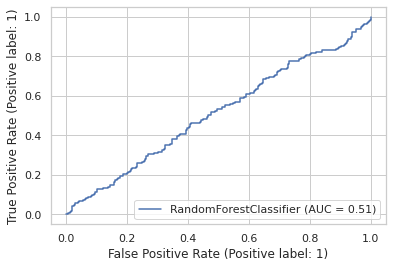

In [193]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test, y_test)  
plt.show()

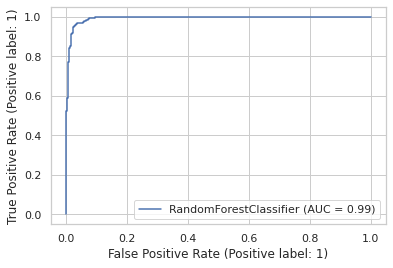

In [194]:
plot_roc_curve(rf, X_train, y_train)  
plt.show()

In [149]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,15.00,0.00,5.00,10.00,0.00,5.00,0.0,10.00,10.00,5.00,0.0,10.00,0.0,15.0,5.00,5.00,5.00,0.0,0.0,0.00
1,30.00,0.00,0.00,30.00,0.00,5.00,0.0,5.00,10.00,0.00,0.0,0.00,15.0,0.0,0.00,0.00,5.00,0.0,0.0,0.00
2,25.00,0.00,8.33,0.00,16.67,8.33,0.0,8.33,8.33,16.67,0.0,0.00,0.0,0.0,8.33,0.00,0.00,0.0,0.0,0.00
3,20.00,0.00,5.00,5.00,0.00,20.00,0.0,0.00,5.00,0.00,0.0,0.00,0.0,15.0,0.00,10.00,0.00,5.0,10.0,5.00
4,7.14,14.29,0.00,7.14,0.00,35.71,0.0,7.14,0.00,0.00,0.0,7.14,0.0,0.0,0.00,7.14,7.14,0.0,0.0,7.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,8.00,0.00,0.00,4.00,4.00,8.00,0.0,0.00,0.00,8.00,0.0,0.00,16.0,0.0,20.00,16.00,8.00,8.0,0.0,0.00
1883,10.00,0.00,5.00,10.00,10.00,5.00,0.0,10.00,10.00,0.00,5.0,0.00,5.0,5.0,5.00,10.00,5.00,0.0,0.0,5.00
1884,5.00,0.00,0.00,15.00,5.00,5.00,0.0,10.00,10.00,0.00,5.0,5.00,5.0,15.0,5.00,0.00,10.00,5.0,0.0,0.00
1885,5.00,0.00,5.00,0.00,0.00,5.00,0.0,5.00,15.00,10.00,5.0,15.00,0.0,0.0,0.00,5.00,10.00,15.0,0.0,5.00


In [150]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'IG')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [151]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'IG'])
df

,Feature,IG
0,AAC_A,0.119325
1,AAC_C,0.432147
2,AAC_D,0.011894
3,AAC_E,0.061363
4,AAC_F,0.018469
5,AAC_G,0.044816
6,AAC_H,0.024310
7,AAC_I,0.025482
8,AAC_K,0.012023
9,AAC_L,0.058577


Text(0.5, 0, 'Feature Importance')

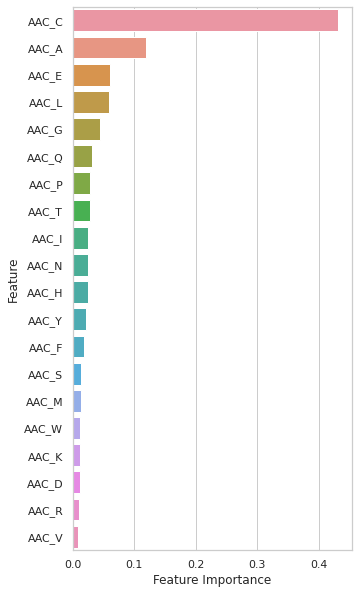

In [152]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('IG', ascending=False)[:20] # Sort by IG in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'IG', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")